# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


# Описание данных
•	Name — название игры <br>
•	Platform — платформа <br>
•	Year_of_Release — год выпуска <br>
•	Genre — жанр игры <br>
•	NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
•	EU_sales — продажи в Европе (миллионы проданных копий) <br>
•	JP_sales — продажи в Японии (миллионы проданных копий) <br>
•	Other_sales — продажи в других странах (миллионы проданных копий) <br>
•	Critic_Score — оценка критиков (максимум 100) <br>
•	User_Score — оценка пользователей (максимум 10) <br>
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# План работы
1. [Открытие данных](#start)
2. [Подготовка данных](#preprocessing)
3. [Анализ данных](#analysys)
4. [Составление портрета пользователя по регионам](#portrait)
    * [Северная Америка](#na)
    * [Европа](#eu)
    * [Япония](#jp)
5. [Проверка гипотез](#hypoths)
    * [Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hyp1)
    * [Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные](#hyp2)
6. [Общий вывод](#conclusions)

<a id="start"><h1>1. Открытие данных</h1> </a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id="preprocessing"><h1>2. Подготовка данных</h1> </a>

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
data.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower()

Опишите, в каких столбцах заменили тип данных и почему;

Обработаем пропуски

In [6]:
data[data['year_of_release'].isnull()].head()
len(data[data['year_of_release'].isnull()])

269

In [7]:
#Для 4 ячеек поставим год вручную, взяв его из названия, оставшиеся удалим, их  мало
data.loc[183,'year_of_release'] = 2004
data.loc[377,'year_of_release'] = 2004
data.loc[475,'year_of_release'] = 2006
data.loc[1650,'year_of_release'] = 2003


In [8]:
len(data[data['name'].isnull()])

2

In [9]:
len(data[data['genre'].isnull()])

2

In [10]:
#пропуски в жанрах и названиях - всего по 2 строки, удаляем
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

В столбце 'user_score' содержится значения "tbd", заменим их на NaN -  "Будет определено"

In [11]:
data.loc[data['user_score'] =='tbd','user_score'] = np.nan

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16714
Data columns (total 11 columns):
name               16448 non-null object
platform           16448 non-null object
year_of_release    16448 non-null float64
genre              16448 non-null object
na_sales           16448 non-null float64
eu_sales           16448 non-null float64
jp_sales           16448 non-null float64
other_sales        16448 non-null float64
critic_score       7986 non-null float64
user_score         7466 non-null object
rating             9771 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в `critic_score`, `user_score`, `rating` заполнять значениями или удалять нельзя - это повлияет на результаты анализа. Они появились в результате того, что по неокторым играм еще нет оценок. Заменим эти пропуски на значение "отзыв ожидается" - `rp` (review pending)

In [13]:
data.loc[data.loc[:,'rating'].isnull(),'rating'] = 'Unknown'

In [14]:
data.duplicated().sum()
#дубликатов нет

0

Преобразуем данные в нужные типы

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')
#data['user_score'] = data['user_score'].astype('float')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
data['total_sales'] = data.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


<div class="alert alert-block alert-info">
    

Выводы по шагу предобработки:<br>
    1. Названия столбцов приведены к нижнему регистру<br>
    2. Обработаны пропуски: <br>
    ---сроки с пропущенными годами, названиями, жанрами удалены, т.к.их количество незначительно;<br>
    ---пропуски в рейтинге заменены на Unknown - "неизвестный рейтинг";<br>
    ---значения "tbd" в 'user_score' заменены на NaN - "Будет определено"<br>
    3. Данные преобразованы в нужные типы<br>
    4. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец<br>
    5. Проведена проверка на дубликаты<br>
    
</div>

<a id="analysys"><h1>3. Исследовательский анализ данных</h1> </a>

Определим, сколько игр выпускалось в разные годы

In [17]:
years_groupby = data.groupby('year_of_release').agg({'name':'count'})

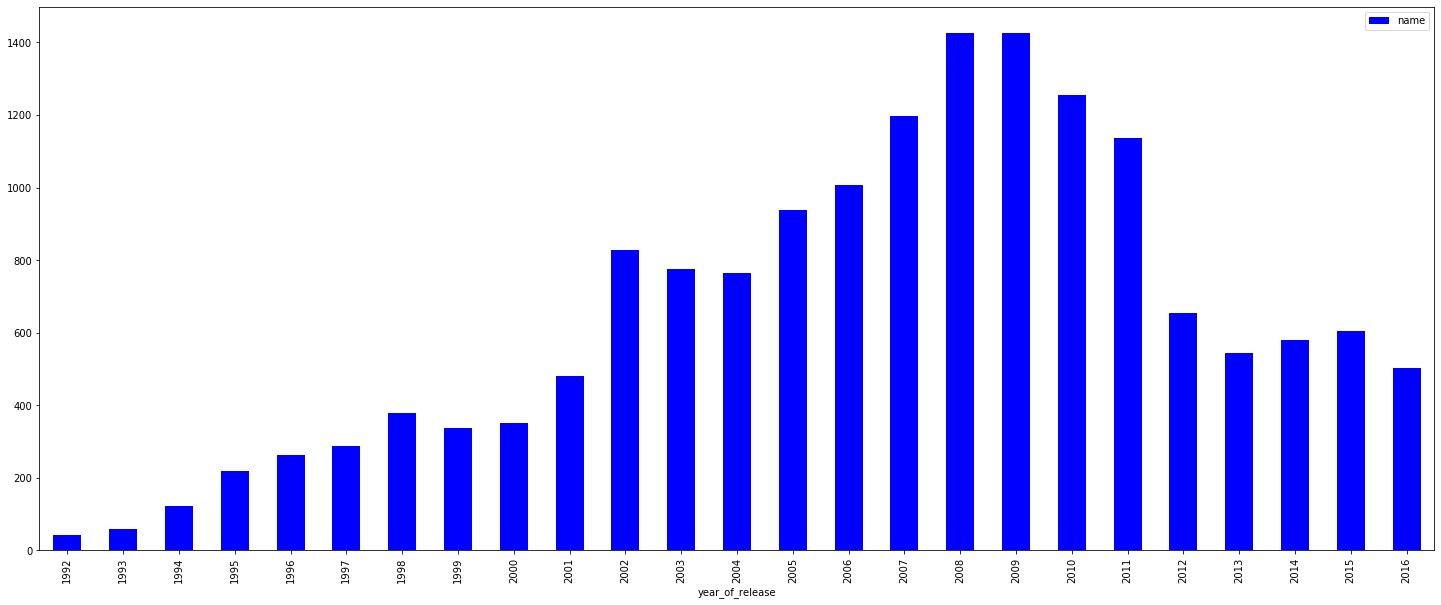

In [18]:
years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'b')

Данные по всем периодам не важны. До 1995 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Больше всего игр было выпущено в период с 2002 по 2011 год.

Определим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [19]:
platform_sales = pd.pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values('total_sales',ascending=False)
platform_sales

,total_sales
platform,
PS2,1246.52
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из сводной таблицы хорошо видно лидеров: это 6 платформ.

In [20]:
best_6pl = list(platform_sales.index[:6])
best_6pl

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [21]:
for platform in best_6pl:
    print('Платформа ',platform)
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    print(platform_sales)
    print()

Платформа  PS2
                          total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  185.53
         2004                  220.55
         2005                  160.66
         2006                  106.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

Платформа  X360
                          total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014     

Для платформ, которые пользуются популярностью, срок активного использования равен 5-7 лет. У компании Sony хорошо прослеживается преемственность PS - PS2 - PS3 - PS4 по годам.

In [22]:
platform_pivot_table_years = data.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
platform_pivot_table_years['years'] =  platform_pivot_table_years.index
platform_pivot_table_years['years'] = platform_pivot_table_years['years'].apply (lambda row: row[1]).astype('int')
platform_pivot_table_years

total_sales  years
platform year_of_release                    
2600     1980                   11.38   1980
         1981                   35.68   1981
         1982                   28.88   1982
         1983                    5.84   1983
         1984                    0.27   1984
...                               ...    ...
XB       2008                    0.18   2008
XOne     2013                   18.96   2013
         2014                   54.07   2014
         2015                   60.14   2015
         2016                   26.15   2016

[238 rows x 2 columns]

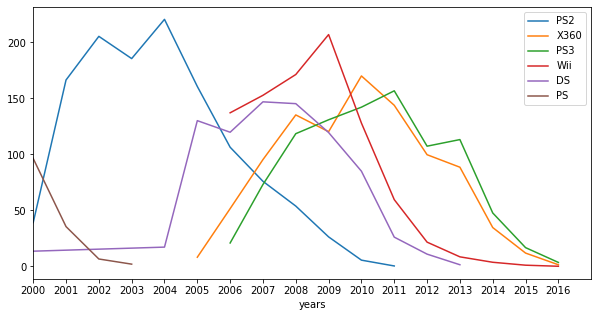

In [23]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in best_6pl:
    platform_pivot_table_years.loc[platform].plot('years','total_sales', ax=ax)
ax.legend(best_6pl,prop = {'size':10})
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(2000,2017))
ax.set_xticklabels(range(2000,2017))
plt.show()

Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года. Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
Вывод: актуальный период по продажам - 2013 - 2016 год.

In [24]:
actual_data = data.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int32
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             2233 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


Определим, какие платформы лидируют по продажам в актуальный период? 

In [25]:
best_sales_platform = pd.pivot_table(actual_data, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [26]:
best_actual = pd.pivot_table(actual_data, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_actual.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Самые прибыльные платформы: PS4, PS3, XOne, X360 и 3DS. Продажи растут: PS4, XOne, 3DS, WiiU и PSV. Продажи падают: PS3, X360, DS, Wii и PSP.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

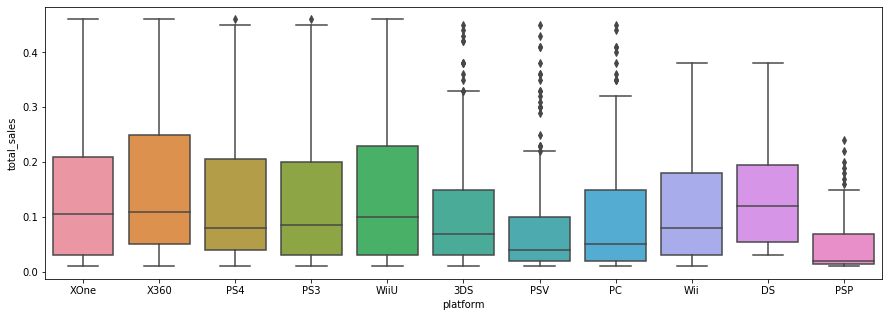

In [27]:
top_quantile = actual_data['total_sales'].quantile(0.75)
low_quantile = actual_data['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_data.query('total_sales <= @threshold'),ax=ax)  

У платформ PS4, PS3 и Wii большая часть значений больше медианного. Наиболее равномерно распределены значения у платформы ХOne, DS

Определим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [28]:
ps4_total_sales = actual_data.query('platform == "PS4"')['total_sales']
ps4_critic_score = actual_data.query('platform == "PS4"')['critic_score']
ps4_user_score = actual_data.query('platform == "PS4"')['user_score']

In [29]:
ps4_user_score

31       NaN
42       8.3
77       4.3
87       NaN
92       5.7
        ... 
16500    7.5
16503    NaN
16526    7.9
16530    5.5
16585    NaN
Name: user_score, Length: 392, dtype: float64

In [30]:
print(ps4_critic_score.corr(ps4_total_sales))
print(ps4_user_score.corr(ps4_total_sales))

0.4065679020617816
-0.03195711020455643


In [31]:
PS4_actual_data = actual_data.query('platform =="PS4"')
PS4_actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [32]:
PS4_sales = PS4_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_sales

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16500,0.01,69.0,7.5
16503,0.01,NaN,NaN
16526,0.01,61.0,7.9
16530,0.01,51.0,5.5


In [33]:
PS4_sales.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F50AEAD108>,
      dtype=object)

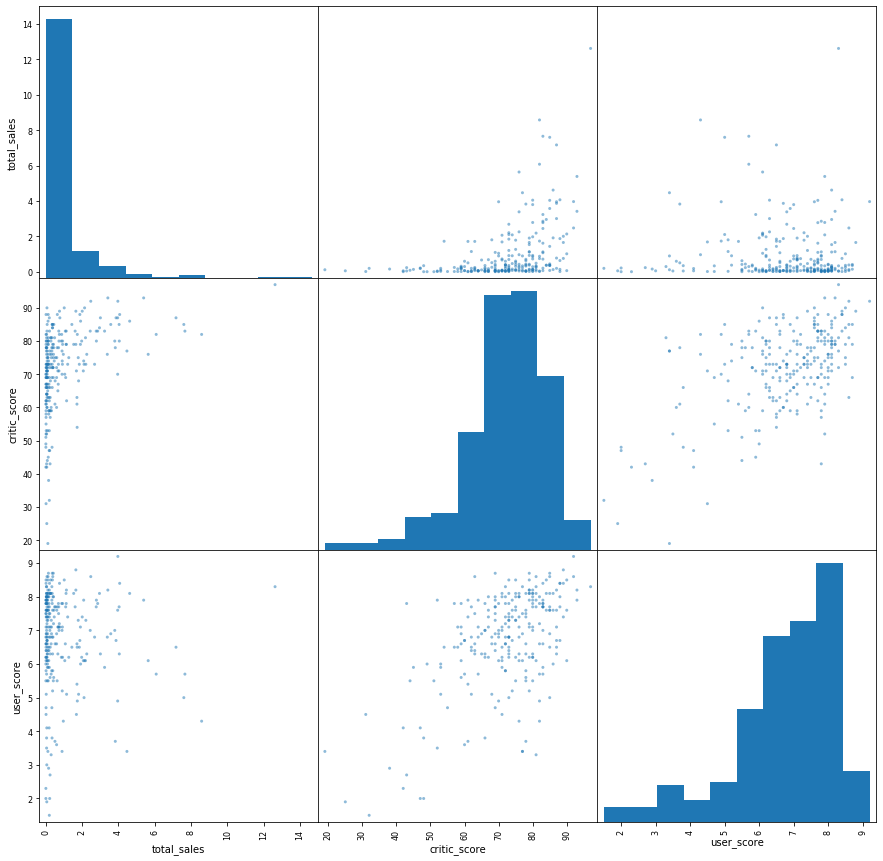

In [34]:
pd.plotting.scatter_matrix(PS4_sales, figsize=(15, 15))

Заметна прямая корреляция прибыли от отценки критиков; от оценки пользователей - очень слабая отрицательная, не стоит обращать на неё внимание.
Для сравнения, посмотрим на ближайшего конкурента - платформу PS3

In [35]:
ps3_total_sales = actual_data.query('platform == "PS3"')['total_sales']
ps3_critic_score = actual_data.query('platform == "PS3"')['critic_score']
ps3_user_score = actual_data.query('platform == "PS3"')['user_score']
print(ps3_critic_score.corr(ps3_total_sales))
print(ps3_user_score.corr(ps3_total_sales))

0.3342853393371919
0.0023944027357566907


И здесь тенденция сохраняется - продажи имеют прямую зависимость от оценок экспертов и не зависят от оценок пользователей.

Определим общее распределение игр по жанрам

In [36]:
genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='total_sales', aggfunc='sum')
genre_pivot_table.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самые прибыльные жанры в рассмотренном временном срезе - это экшн, шутеры, спортивные и ролевые игры (Action, Shooter, Sports, Role-Playing).
Самые неприбыльные - стратегии и головоломки.

In [37]:
genre_analysis = actual_data.groupby('genre').agg({'name':'count','total_sales':['median','mean','sum']})
genre_analysis.columns = ['count','median','mean','sum']
genre_analysis = genre_analysis.sort_values(by = 'sum', ascending = False)
genre_analysis

,count,median,mean,sum
genre,,,,
Action,766,0.110,0.420196,321.87
Shooter,187,0.450,1.245882,232.98
Sports,214,0.240,0.703972,150.65
Role-Playing,292,0.125,0.499623,145.89
Misc,155,0.100,0.405290,62.82
Platform,74,0.225,0.576081,42.63
Racing,85,0.120,0.469294,39.89
Fighting,80,0.125,0.441375,35.31
Adventure,245,0.030,0.096490,23.64


<div class="alert alert-block alert-info">
    
по среднему и медиане стало заметно, что например симуляторы, хотя и имеют высокое среднее значение, выпускались в малом количестве, а потому и суммарный доход был невелик. А вот в жанре adventure было выпущено много игр, но они имеют маленькое медианное значение продаж. 
</div>

In [38]:
genre_analysis = genre_analysis.sort_values(by = 'mean', ascending = False)
genre_analysis

,count,median,mean,sum
genre,,,,
Shooter,187,0.450,1.245882,232.98
Sports,214,0.240,0.703972,150.65
Platform,74,0.225,0.576081,42.63
Role-Playing,292,0.125,0.499623,145.89
Racing,85,0.120,0.469294,39.89
Fighting,80,0.125,0.441375,35.31
Action,766,0.110,0.420196,321.87
Misc,155,0.100,0.405290,62.82
Simulation,62,0.100,0.350968,21.76


<div class="alert alert-block alert-info">
    

По средним продажам жанры - лидеры - это шутеры, спортивные и platform-игры. 
</div>

<div class="alert alert-block alert-info">

Выводы по шагу:
    
    1.  Больше всего игр было выпущено в период с 2002 по 2011 год.
    2. Самые прибыльные платформы: PS4, PS3, XOne, X360 и 3DS. Продажи растут: PS4, XOne, 3DS, WiiU и PSV. Продажи падают: PS3, X360, DS, Wii и PSP.
    3. Актуальный период по продажам - 2013 - 2016 год.
    4. Для проанализированных платформ PS4 и PS3 заметна прямая корреляция прибыли от оценки критиков; от оценки пользователей - очень слабая отрицательная, не стоит обращать на неё внимание.
    5. Среди самых прибыльных жанров: Shooters, Sports, Platform.
</div>

<a id="portrait"><h1>4. Составление портрета пользователя по регионам</h1> </a>

<a id="na"><h1>Северная Америка</h1> </a>

Самые популярные платформы (топ-5) 

In [39]:
na_actual = actual_data.query('na_sales > 0')
na_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
name               1309 non-null object
platform           1309 non-null object
year_of_release    1309 non-null int32
genre              1309 non-null object
na_sales           1309 non-null float64
eu_sales           1309 non-null float64
jp_sales           1309 non-null float64
other_sales        1309 non-null float64
critic_score       809 non-null float64
user_score         974 non-null float64
rating             1309 non-null object
total_sales        1309 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 127.8+ KB


In [40]:
na_platform = pd.pivot_table(na_actual, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS. Заметна сильная конкуренция между Microsoft и Sony

Самые популярные жанры (топ-5) 

In [41]:
na_genre = pd.pivot_table(na_actual, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


Топ 5 жанров по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc, причем экшн и шутеры лидируют с заметным отрывом

Влияет ли рейтинг ESRB на продажи в регионе Северная Америка?

In [42]:
na_rating = pd.pivot_table(na_actual, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.21
Unknown,89.42
E,79.05
E10+,54.24
T,49.79


В регионе Северная Америка популярны игры с возрастным рейтингом 17+. 

Портрет пользователя из Северной Америки: от 17 лет, любит играть или на PS4, или на XOne, любит экшены и шутеры.

<a id="eu"><h1>Европа</h1> </a>

Самые популярные платформы (топ-5) 

In [43]:
eu_actual = actual_data.query('eu_sales > 0')
eu_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
name               1422 non-null object
platform           1422 non-null object
year_of_release    1422 non-null int32
genre              1422 non-null object
na_sales           1422 non-null float64
eu_sales           1422 non-null float64
jp_sales           1422 non-null float64
other_sales        1422 non-null float64
critic_score       872 non-null float64
user_score         1047 non-null float64
rating             1422 non-null object
total_sales        1422 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 138.9+ KB


In [44]:
eu_platform = pd.pivot_table(eu_actual, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


Топ 5 платформ по Европейскому региону: PS4, PS3, XOne, X360 и 3DS. Здесь нет такой сильной конкуренции между производителями, как в Америке, и лидер один - это PS4 (Sony Interactive Entertainment)

Самые популярные жанры (топ-5) 

In [45]:
eu_genre = pd.pivot_table(eu_actual, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


Европейские игроки, как и американские, предпочитают играть в экшены и шутеры

Влияет ли рейтинг ESRB на продажи в регионе Европа?

In [46]:
eu_rating = pd.pivot_table(eu_actual, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
Unknown,78.91
E10+,42.69
T,41.95


Возрастной рейтинг похож на ситуацию в Америке, рынок тоже ориентирован на игроков 17+

Портрет пользователя из Европы: от 17 лет, любит играть или на PS4, или на PS3, любит экшены и шутеры.

<a id="jp"><h1>Япония</h1> </a>

Самые популярные платформы (топ-5) 

In [47]:
jp_actual = actual_data.query('jp_sales > 0')
jp_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
name               1187 non-null object
platform           1187 non-null object
year_of_release    1187 non-null int32
genre              1187 non-null object
na_sales           1187 non-null float64
eu_sales           1187 non-null float64
jp_sales           1187 non-null float64
other_sales        1187 non-null float64
critic_score       410 non-null float64
user_score         462 non-null float64
rating             1187 non-null object
total_sales        1187 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 115.9+ KB


In [48]:
jp_platform = pd.pivot_table(jp_actual, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


В Японии лидером является производитель Nintendo (3DS). Вообще же топ 5 по платформам в Японии: 3DS, PS3, PSV, PS4 и WiiU

Самые популярные жанры (топ-5) 

In [49]:
jp_genre = pd.pivot_table(jp_actual, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Топ 5 по жанрам Японии: Role-Playing, Action, Misc, Fighting и Shooter. Игрокам этого региона больше нравятся игры "со смыслом" - ролевые, экшен, аркады

Влияет ли рейтинг ESRB на продажи в регионе Европа?

In [50]:
jp_rating = pd.pivot_table(jp_actual, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
Unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


Среди игр с имеющимся рейтингом, лидирует рейтинг Т - подростки 13+. Производители ориентируются на подростков

Портрет пользователя из Японии: от 13 лет, любит играть или на 3DS, или на PS3, любит ролевые игры и экшены.

<table class="blueTable">
<thead>
<tr>
<th>Регион</th>
<th>Платформы</th>
<th>Жанры</th>
<th>ESRB</th>
<th>Портрет пользователя</th>
</tr>
</thead>
<tfoot>
<tr>
<td colspan="5">
<div class="links"><a href="#">&laquo;</a> <a class="active" href="#">1</a> <a href="#">2</a> <a href="#">3</a> <a href="#">4</a> <a href="#">&raquo;</a></div>
</td>
</tr>
</tfoot>
<tbody>
<tr>
<td>Сев.Америка</td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">PS4, XOne, X360, PS3, 3DS</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">Action, Shooter, Sports, Role-Playing,Misc</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">17+</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">от 17 лет, любит играть или на PS4, или на XOne, любит экшены и шутеры</span></td>
</tr>
<tr>
<td>Европа</td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">PS4, PS3, XOne, X360, 3DS</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">Action, Shooter, Sports, Role-Playing, Racing</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">17+</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">от 17 лет, любит играть или на PS4, или на PS3, любит экшены и шутеры</span></td>
</tr>
<tr>
<td>Япония</td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">3DS, PS3, PSV, PS4,WiiU</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">Role-Playing, Action, Misc, Fighting, Shooter</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">13+</span></td>
<td><span style="color: #000000; font-size: 14px; background-color: #ffffff;">от 13 лет, любит играть или на 3DS, или на PS3, любит ролевые игры и экшены</span></td>
</tr>
</tbody>
</table>

<a id="hypoths"><h1>5. Проверка гипотез</h1> </a>

<a id="hyp1">Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые </a>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Альтернативная гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [51]:
#не будем учитывать игры с неуказанным рейтингом
actual_data_no_rp = actual_data.query('user_score != "rp"').dropna()
actual_data_no_rp['user_score'].describe()

count    976.000000
mean       6.739037
std        1.500462
min        1.000000
25%        6.000000
50%        7.100000
75%        7.825000
max        9.300000
Name: user_score, dtype: float64

In [52]:
xone_user_score = actual_data_no_rp.query('platform == "XOne"')['user_score']
pc_user_score = actual_data_no_rp.query('platform == "PC"')['user_score']
xone_var = xone_user_score.var()
pc_var = pc_user_score.var()
print(xone_var)
print(pc_var)


1.79639911308204
2.932444842801986


In [53]:
mean_xone = xone_user_score.mean()
mean_pc = pc_user_score.mean()
print(mean_xone)
print(mean_pc)

6.538181818181818
6.3020270270270276


ВидНо, что дисперсии выборок отличается более чем на 10%, поэтому берем аргумент equal_var=False в Т-тесте.

In [54]:
alpha = 0.05

result_1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)
prob1 = result_1.pvalue
print('р-значение: ',prob1)
if prob1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.1788264826340131
Не получилось отвергнуть нулевую гипотезу


Опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5% не получилось, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся

<a id="hyp2">Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные </a>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые <br>
Альтернативна гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Отлично, гипотезы сформулированы верно
    
</div>

In [55]:
action_user_score = actual_data_no_rp.query('genre == "Action"')['user_score']
sports_user_score = actual_data_no_rp.query('genre == "Sports"')['user_score']
xone_var = action_user_score.var()
pc_var = sports_user_score.var()
print(xone_var)
print(pc_var)

1.6462144328163746
2.1316396997497913


In [56]:
result_2 = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
prob2 = result_2.pvalue
print('р-значение: ',prob2)
if prob2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.0496920005008586e-13
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports (спорт) разные. У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.

<a id="conclusions"><h1>6. Общий вывод</h1> </a>

Рынок видеоигр неоднороден – между регионами продаж и платформами есть заметные различия, которые, вероятно, объясняются разными предпочтениями пользователей.  Для каждого региона и платформы есть свои топовые жанры и свой предел продаж.
Везде, кроме Японии, игры на стационарных консолях продаются лучше, чем на портативных и компьютерах (в Японии – лидер портативные консоли). Везде, кроме Японии, лучше всего продаются шутеры (в Японии – RPG). В среднем наибольшие продажи будут на платформе Sony PlayStation 4, у этой же платформы и рекорд по максимальным продажам. Если сделать прогноз о наиболее прибыльной игре - стоит выбрать шутер для Sony PlayStation 4, с маркировкой 17+, и стремиться получить по ней хорошие оценки критиков.


<div class="alert alert-block alert-info">

    Рынок видеоигр неоднороден – между регионами продаж и платформами есть заметные различия, которые, вероятно, объясняются разными предпочтениями пользователей.<br>
    Для каждого региона и платформы есть свои топовые жанры и свой предел продаж:
    
    1. Везде, кроме Японии, игры на стационарных консолях продаются лучше, чем на портативных и компьютерах (в Японии – лидер портативные консоли). 
    2. Везде, кроме Японии, лучше всего продаются шутеры (в Японии – RPG). 
    3. В среднем наибольшие продажи будут на платформе Sony PlayStation 4, у этой же платформы и рекорд по максимальным продажам. 
    4. Если сделать прогноз о наиболее прибыльной игре - стоит выбрать шутер для Sony PlayStation 4, с маркировкой 17+, и стремиться получить по ней хорошие оценки критиков.
</div>